In [4]:
import numpy as np
import math
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [5]:
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.1307,),(0.3081,)), # mean value = 0.1307, standard deviation value = 0.3081
])

In [6]:
data_path = './MNIST'

training_set = datasets.MNIST(root = data_path, train= True, download=True, transform= transform)
testing_set = datasets.MNIST(root = data_path, train= False, download=True, transform= transform)

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw
Processing...

Done!


/Users/jason/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1595629430416/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
from torch import nn
from torch.nn import functional as F

In [30]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out


In [31]:
device = torch.device('cpu')

In [32]:
criterion = nn.NLLLoss()
classifier = classification().to(device)
learning_rate_value = 0.01
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)

In [33]:
def calc(epochs, tr_data_set, te_dataset):
    tr_loss_Liters = []
    tr_acc_Liters = []
    te_loss_Liters = []
    te_acc_Liters = []
    
    for i in range (epochs):
        tr_avg_loss = 0
        tr_avg_acc = 0
        te_avg_loss =0
        te_avg_acc = 0
        
        for x, y in tr_data_set:
            x = x.view(-1, 28*28).to(device)
            y = y.to(device)
            optimizer.zero_grad()
            y_pred = classifier(x)
            tr_loss = criterion(y_pred, y)
            tr_loss.backward()
            optimizer.step()
            
            tr_avg_loss += tr_loss / len(tr_data_set)
            pred = torch.argmax(y_pred, 1) == y
            tr_acc = pred.float().mean()
            tr_avg_acc += tr_acc.item() / len(tr_data_set)
            
        for x,y in te_dataset:
            x = x.view(-1, 28*28).to(device)
            y = y.to(device)
            y_pred = classifier(x)
            te_loss = criterion(y_pred, y)
            
            te_avg_loss += te_loss / len(te_dataset)
            pred = torch.argmax(y_pred, 1) == y
            te_acc = pred.float().mean()
            te_avg_acc += te_acc.item() / len(te_dataset)
            
        
        tr_loss_Liters.append(tr_avg_loss)
        tr_acc_Liters.append(tr_avg_acc)
        te_loss_Liters.append(te_avg_loss)
        te_acc_Liters.append(te_avg_acc)
        print(i)
        
    return tr_loss_Liters, tr_acc_Liters, te_loss_Liters, te_acc_Liters
            

In [34]:
#optimization
#stochastic gradient descent with batch size 32
batch_size = 32
epochs = 60

#train data
training_set_32 = torch.utils.data.DataLoader(dataset = training_set, batch_size = batch_size, shuffle = True, drop_last = True)
testing_set_32 = torch.utils.data.DataLoader(dataset = testing_set, batch_size = batch_size, shuffle = True, drop_last = True)

tr_loss_32 = []
tr_accs_32 = []
te_loss_32 = []
te_accs_32 = []

tr_loss_32, tr_acc_32, te_loss_32, te_acc_32 = calc(epochs, training_set_32, testing_set_32)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [ ]:
#optimization
#stochastic gradient descent with batch size 32
batch_size = 64
epochs = 60

#train data
training_set_64 = torch.utils.data.DataLoader(dataset = training_set, batch_size = batch_size, shuffle = True, drop_last = True)
testing_set_64 = torch.utils.data.DataLoader(dataset = testing_set, batch_size = batch_size, shuffle = True, drop_last = True)

tr_loss_64 = []
tr_accs_64 = []
te_loss_64 = []
te_accs_64 = []

tr_loss_64, tr_acc_64, te_loss_64, te_acc_64 = calc(epochs, training_set_64, testing_set_64)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [ ]:
#optimization
#stochastic gradient descent with batch size 32
batch_size = 128
epochs = 60

#train data
training_set_128 = torch.utils.data.DataLoader(dataset = training_set, batch_size = batch_size, shuffle = True, drop_last = True)
testing_set_128 = torch.utils.data.DataLoader(dataset = testing_set, batch_size = batch_size, shuffle = True, drop_last = True)

tr_loss_128 = []
tr_accs_128 = []
te_loss_128 = []
te_accs_128 = []

tr_loss_128, tr_acc_128, te_loss_128, te_acc_128 = calc(epochs, training_set_128, testing_set_128)

1. Plot the training and testing losses with a batch size of 32

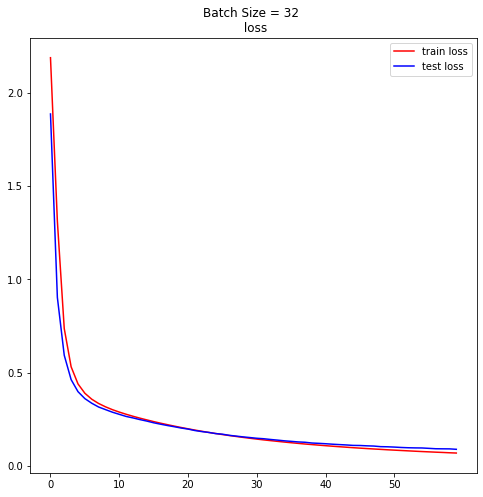

In [35]:
plt.figure(1, figsize = (8, 8))
plt.plot(np.array(range(epochs)), tr_loss_32, c='r', label='train loss')
plt.plot(np.array(range(epochs)), te_loss_32, c='b', label='test loss')
plt.title('Batch Size = 32 \n loss')
plt.xticks(range(0, epochs, 10))
plt.legend()
plt.show()


2. Plot the training and testing accuracies with a batch size of 32

In [ ]:
plt.figure(1, figsize = (8, 8))
plt.plot(np.array(range(epochs)), tr_acc_32, c='r', label='train accuracy')
plt.plot(np.array(range(epochs)), te_acc_32, c='b', label='test accuracy')
plt.title('Batch Size = 32 \n accuracy')
plt.xticks(range(0, epochs, 10))
plt.legend()
plt.show()

3. Plot the training and testing losses with a batch size of 64

4. Plot the training and testing accuracies with a batch size of 64

5. Plot the the tr